In [1]:
import pandas as pd

In [2]:
import pandas as np

In [3]:
import math

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [8]:
data=pd.read_csv("rainfall.csv")

In [11]:
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(data.mean())
print("Mean of data:")
print(data.mean())
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)

Data heads:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    

C:\Users\Dell\AppData\Local\Temp\ipykernel_3796\1641425488.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())
C:\Users\Dell\AppData\Local\Temp\ipykernel_3796\1641425488.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())


In [12]:
print("Info:")
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtype

In [13]:
print("Group by:")
data.groupby('SUBDIVISION').size()

Group by:


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

In [14]:
print("Co-Variance =",data.cov())
print("Co-Relation =",data.corr())

Co-Variance =                 YEAR          JAN          FEB           MAR           APR  \
YEAR     1098.319127   -62.525455   -26.333846     31.608776     17.985597   
JAN       -62.525455  1126.880700   549.299548    627.375837    475.344306   
FEB       -26.333846   549.299548  1288.551221    974.300386    892.111938   
MAR        31.608776   627.375837   974.300386   2201.972143   1766.214414   
APR        17.985597   475.344306   892.111938   1766.214414   4596.594854   
MAY        14.668989   535.377197   896.648721   2094.072720   5433.121872   
JUN      -105.646427  -265.334667   283.409286   1819.002965   7239.347234   
JUL      -144.815256  -465.128448   156.524886   1227.377060   4883.946095   
AUG        40.268753    75.536029   488.385320   1195.021166   3275.971621   
SEP       -29.893921   110.216877   388.537697   1133.597551   3507.500523   
OCT         7.922814    41.252990   -16.324506    401.044464   2478.380760   
NOV       -42.624271   154.517515   -57.342083    

In [15]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns:",corr_cols.index)

Index of correlation columns: Index(['ANNUAL', 'Jun-Sep', 'JUN', 'JUL', 'AUG', 'SEP', 'MAY', 'Mar-May',
       'OCT', 'APR', 'Oct-Dec', 'MAR', 'NOV', 'DEC', 'FEB', 'Jan-Feb', 'JAN',
       'YEAR'],
      dtype='object')


Scatter plot of annual and january attributes


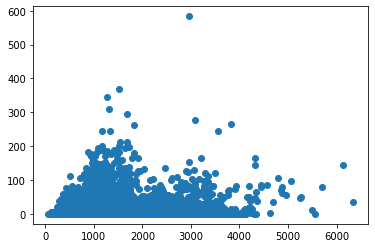

In [16]:
print("Scatter plot of annual and january attributes")
plt.scatter(data.ANNUAL,data.JAN)

Box Plot of annual rainfall data in years 1901-2015


<AxesSubplot:>

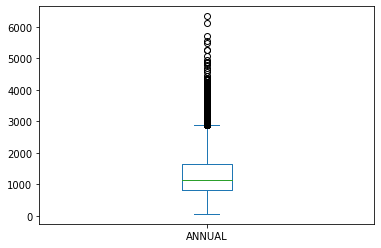

In [17]:
print("Box Plot of annual rainfall data in years 1901-2015")
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


<AxesSubplot:>

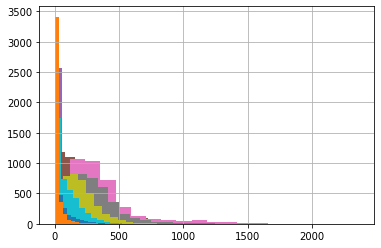

In [18]:
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)

Histogram showing the annual rainfall of the all states:


<AxesSubplot:>

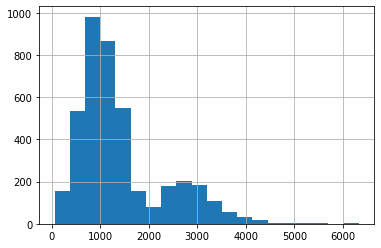

In [19]:
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)

Violin plot of the ANNUAL attribute :-


<AxesSubplot:>

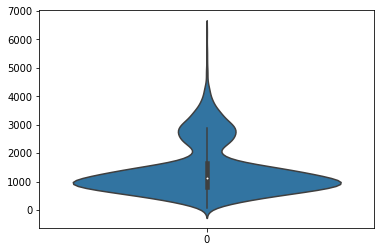

In [20]:
print("Violin plot of the ANNUAL attribute :-")
sb.violinplot(data=data['ANNUAL'])